In [14]:
# Importamos las librerías que necesitamos

# Librerías para control y automatización de navegadores (Web Scraping)
# -----------------------------------------------------------------------
from selenium import webdriver                   # Para controlar el navegador automáticamente
from selenium.webdriver.chrome.service import Service  # Para manejar los servicios de ChromeDriver
from selenium.webdriver.common.by import By      # Para seleccionar elementos en el DOM de la página
from selenium.webdriver.chrome.options import Options  # Para establecer opciones en el navegador (como headless mode)
import time                                      # Para gestionar el tiempo (pausas)

# Librerías para extracción y scraping de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup  # Para analizar y extraer datos de HTML y XML, utilizada en scraping web
import requests                # Para hacer solicitudes HTTP y obtener datos de páginas web
import tqdm                    # Para mostrar barras de progreso en bucles largos

# Librerías para el tratamiento y manipulación de datos
# -----------------------------------------------------------------------
import pandas as pd             # Para manipular estructuras de datos como DataFrames
import numpy as np              # Para cálculos numéricos y arrays multidimensionales
import datetime                 # Para manejar fechas y horas

# Manejo del tiempo y generación de pausas
# -----------------------------------------------------------------------
from time import sleep          # Para pausar la ejecución del código por un tiempo determinado
import random                   # Para generar valores aleatorios, útil para espaciar solicitudes web

# Para importar módulos desde rutas recursivas
# -----------------------------------------------------------------------
import sys
sys.path.append("../")  # Para poder importar archivos desde carpetas fuera de la raíz del proyecto
from src.SupportAlojamientos import obtain_html, make_df  # Funciones personalizadas de soporte

# Control de advertencias
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')  # Ignorar advertencias para una salida de consola más limpia

# Librerías para visualización de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt     # Para crear gráficos y visualizaciones básicas
import seaborn as sns               # Para visualizaciones estadísticas más avanzadas y atractivas


# Vamos a buscar los apartamentos para todas las fechas de los vuelos

Usando BeautifulSoup y requests, nos vamos a guardar las urls y para que no nos bloqueen, lo guardaremos en un HTML
URLs:

1er Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-10-24&checkout=2024-10-27&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8

2do Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-10-31&checkout=2024-11-03&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8

3er Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-07&checkout=2024-11-10&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8

4to Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-14&checkout=2024-11-17&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8

5to Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-21&checkout=2024-11-24&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8

6to Finde
- https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-28&checkout=2024-12-01&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8




In [15]:
urls_airbnb = ["https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-10-24&checkout=2024-10-27&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8",
               "https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-10-31&checkout=2024-11-03&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8",
               "https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-07&checkout=2024-11-10&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8",
               "https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-14&checkout=2024-11-17&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8",
               "https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-21&checkout=2024-11-24&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8",
               "https://www.airbnb.es/s/M%C3%B3naco/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=M%C3%B3naco&place_id=ChIJMYU_e2_CzRIR_JzEOkx493Q&date_picker_type=calendar&checkin=2024-11-28&checkout=2024-12-01&adults=4&source=structured_search_input_header&search_type=filter_change&search_mode=regular_search&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8"
               ]

rutas_guardar = ["../datos/html_backups/airbnb_monaco_finde1.html",
                 "../datos/html_backups/airbnb_monaco_finde2.html",
                 "../datos/html_backups/airbnb_monaco_finde3.html",
                 "../datos/html_backups/airbnb_monaco_finde4.html",
                 "../datos/html_backups/airbnb_monaco_finde5.html",
                 "../datos/html_backups/airbnb_monaco_finde6.html"]

# Guardamos los HTML por fin de semana

In [5]:
obtain_html(urls_airbnb,rutas_guardar)

# Los leemos y volvemos soup

In [16]:
finde_soups = {}
# Leer todos los HTML
for i, file_path in enumerate(rutas_guardar, start=1):
    with open(file_path, "r", encoding="utf-8") as file:
        page_content = file.read()
        soup = BeautifulSoup(page_content, "html.parser")
        # Guardar con variables dinamicas
        finde_soups[f'finde{i}'] = soup

finde1 = finde_soups['finde1']
finde2 = finde_soups['finde2']
finde3 = finde_soups['finde3']
finde4 = finde_soups['finde4']
finde5 = finde_soups['finde5']
finde6 = finde_soups['finde6']
findes = [finde1,finde2,finde3,finde4,finde5,finde6]

# Con esta función hacemos el DF

In [17]:
df = make_df(findes)
df.sample(5)

,Título,Descripción,Precio (€),Fecha entrada,Fecha salida
60,Apto. residencial en Beausoleil,Impresionante apartamento a 50 m de Monte-Carlo,585,14 nov.,17
105,Barco en Mónaco,Experiencia única Puerto de Mónaco,1.475,28 nov.,1 dic.
71,Apartamento en Kosovo Polje,Mali Apartment - Kosovo Court,221,14 nov.,17
93,Casa flotante en Mónaco,¡Una estancia de ensueño en nuestro yate!,3.161,21 nov.,24
39,Apartamento en Mónaco,Hermosas vistas con aparcamiento,1.790,31 oct.,3 nov.


# Ahora arreglamos las fechas y precios

Primero generamos condiciones

In [18]:
cond = df["Fecha entrada"] == "24 oct."
cond2 = df["Fecha entrada"] == "31 oct."
cond3 = df["Fecha entrada"] == "7 nov."
cond4 = df["Fecha entrada"] == "14 nov."
cond5 = df["Fecha entrada"] == "21 nov."
cond6 = df["Fecha entrada"] == "28 nov."

Ahora creamos un DataFrame individual para cada uno

In [19]:
df_finde1 = df[cond]
df_finde2 = df[cond2]
df_finde3 = df[cond3]
df_finde4 = df[cond4]
df_finde5 = df[cond5]
df_finde6 = df[cond6]

Igualamos las filas para arreglar las fechas

In [20]:
df_finde1["Fecha entrada"] = "24/10/2024"
df_finde1["Fecha salida"] = "27/10/2024"
df_finde2["Fecha entrada"] = "31/10/2024"
df_finde2["Fecha salida"] = "3/11/2024"
df_finde3["Fecha entrada"] = "7/11/2024"
df_finde3["Fecha salida"] = "10/11/2024"
df_finde4["Fecha entrada"] = "14/11/2024"
df_finde4["Fecha salida"] = "17/11/2024"
df_finde5["Fecha entrada"] = "21/11/2024"
df_finde5["Fecha salida"] = "24/11/2024"
df_finde6["Fecha entrada"] = "28/11/2024"
df_finde6["Fecha salida"] = "1/12/2024"

Concatenamos todo a un solo DF

In [21]:
df = pd.concat([df_finde1,df_finde2,df_finde3,df_finde4,df_finde5,df_finde6],ignore_index=True)

Limpiamos un poco la tabla y ponemos todo en formato adecuado

In [22]:
df["Precio (€)"] = df["Precio (€)"].str.replace(".","").replace("noche,",np.nan)
df = df.dropna(subset=["Precio (€)"])
df["Fecha entrada"] = pd.to_datetime(df["Fecha entrada"],format="mixed")
df["Fecha salida"] = pd.to_datetime(df["Fecha salida"],format="mixed")
df["Precio (€)"] = df["Precio (€)"].astype(int)
df.head()

,Título,Descripción,Precio (€),Fecha entrada,Fecha salida
0,Apto. residencial en Beausoleil,Impresionante apartamento a 50 m de Monte-Carlo,656,2024-10-24,2024-10-27
1,Apartamento en Mónaco,Nuevo balcón de fácil acceso en el centro,851,2024-10-24,2024-10-27
2,Apto. residencial en Mónaco,MONACO- DÚPLEX Apartamento 70 m2 SECTOR CASINO,1335,2024-10-24,2024-10-27
3,Apartamento en Mónaco,Piscina Moyenne Corniche con vistas al mar,884,2024-10-24,2024-10-27
4,Loft en Mónaco,Loft grande en Mónaco,2090,2024-10-24,2024-10-27


In [12]:
df.to_csv("../datos/alojamientos_mónaco.csv")

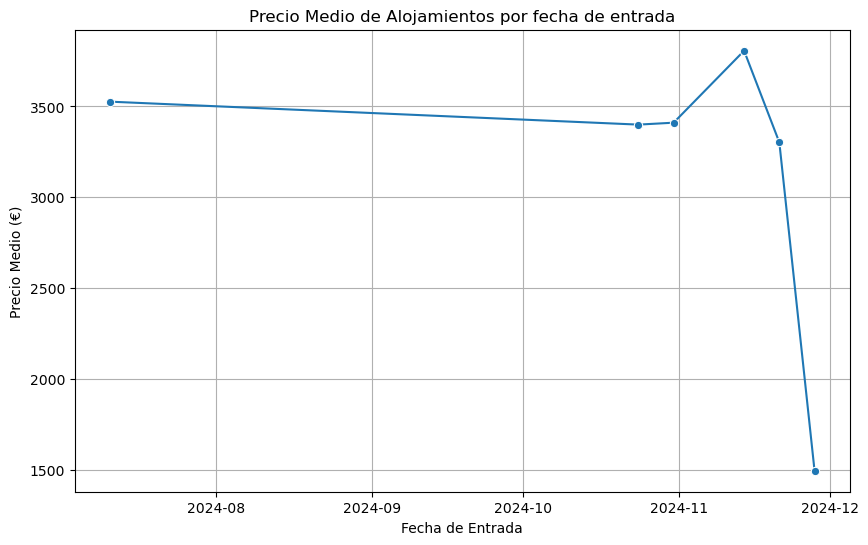

In [26]:
media_precio = df.groupby('Fecha entrada')['Precio (€)'].mean()

# Create the same line plot but using seaborn for a more refined visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=media_precio.index, y=media_precio.values, marker='o')
plt.title('Precio Medio de Alojamientos por fecha de entrada')
plt.xlabel('Fecha de Entrada')
plt.ylabel('Precio Medio (€)')
plt.grid(True)
plt.show()
